In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df=pd.read_csv("k-means.csv")
data=df.copy()

pattern=re.compile("\D+")

data.columns=[0,1,2]
data[1]=data[1].apply(lambda x:int(re.sub(pattern,"",x)))

In [21]:
for i in data.columns:
    data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())

In [68]:
def k_means(df,k,centroids):
    for i in range(30):
        scaleCentroid = [[] for _ in range(k)]
        for coordinates in df.values:
            distance=[]
            for centroid in centroids:
                distance.append(np.sqrt(np.sum((coordinates-centroid)**2)))
               
            dmin=np.argmin(distance)
                
            scaleCentroid[dmin].append(coordinates)
        for i in range(k):
            if np.isnan(np.average(scaleCentroid[i],axis=0)).all():
                continue
            centroids[i] = np.average(scaleCentroid[i],axis=0)
    return centroids,scaleCentroid

/tmp/ipykernel_14005/4091367923.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


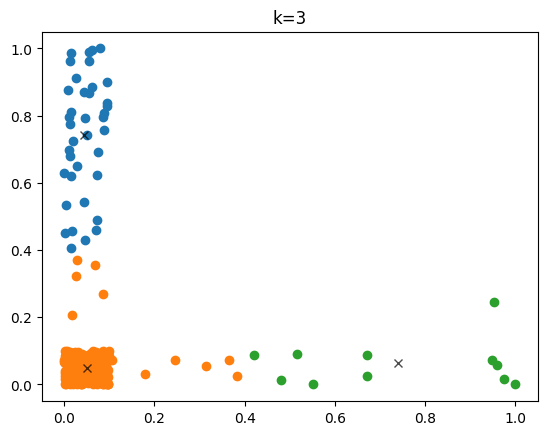

In [62]:
k=3
centroids = np.array([[0.2,1],[0.15,0.2],[1,1]])
centroids,scaleCentroid=k_means(data.iloc[:,1:],k,centroids)

visualize(k,centroids,scaleCentroid)

In [ ]:
s=(data.iloc[:,1:]-centroids[0])**2
# print(s,data.iloc[:,1:])
# print(centroids[0])
print(s[1].sum())
print(s[2].sum())

/tmp/ipykernel_14005/3433961060.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[[0.2  1.  ]
 [0.15 0.2 ]
 [1.   1.  ]
 [0.2  0.6 ]
 [0.1  0.8 ]
 [0.4  0.1 ]
 [1.   0.1 ]
 [0.1  0.9 ]
 [0.1  0.3 ]]


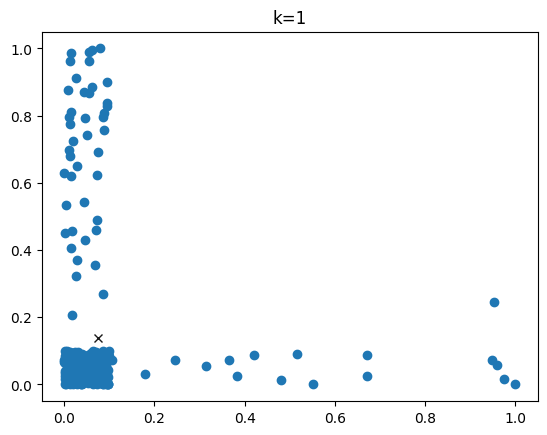

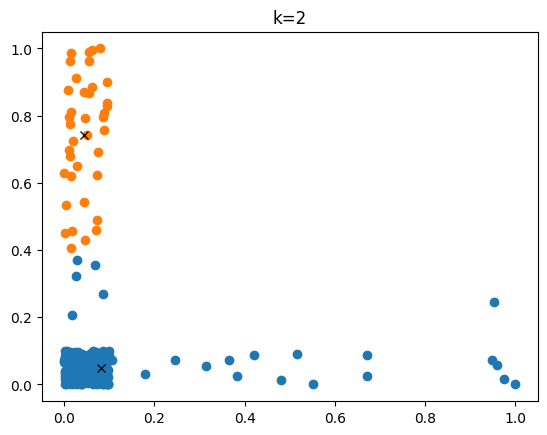

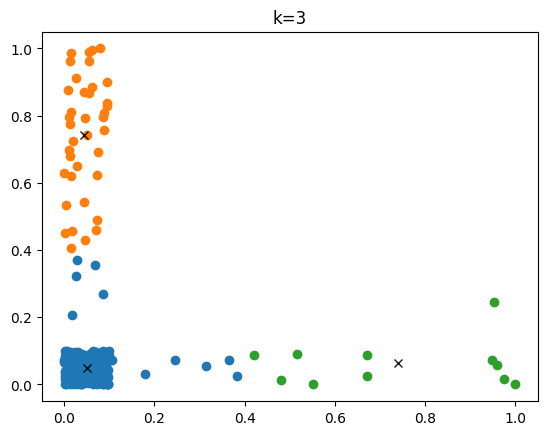

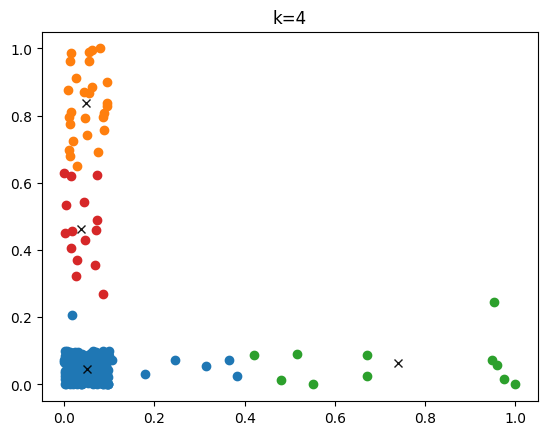

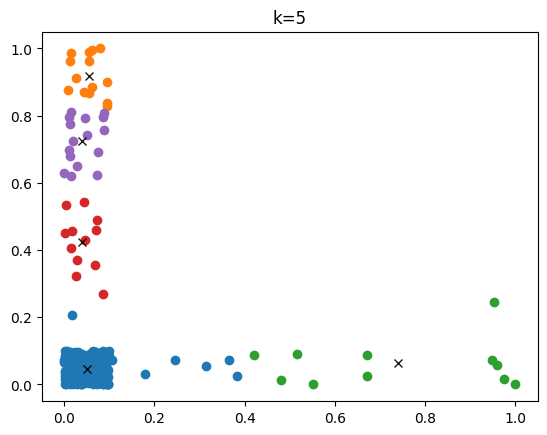

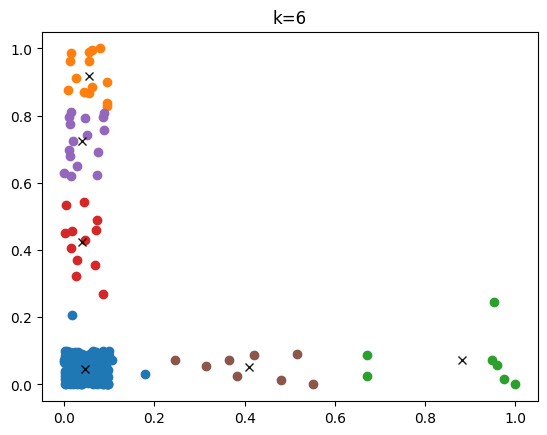

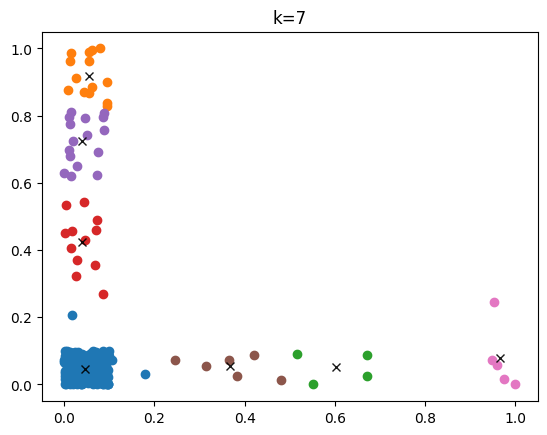

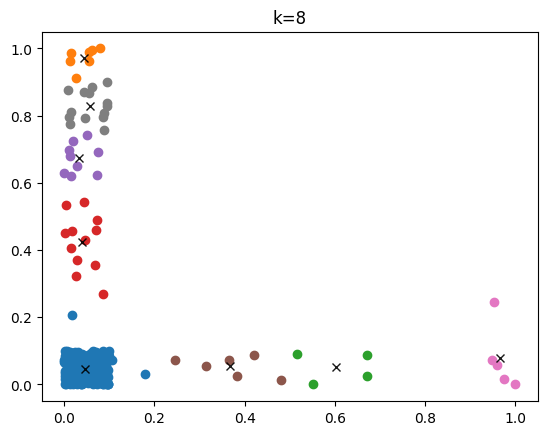

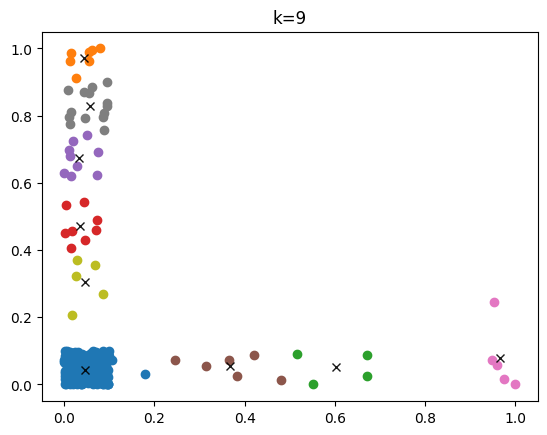

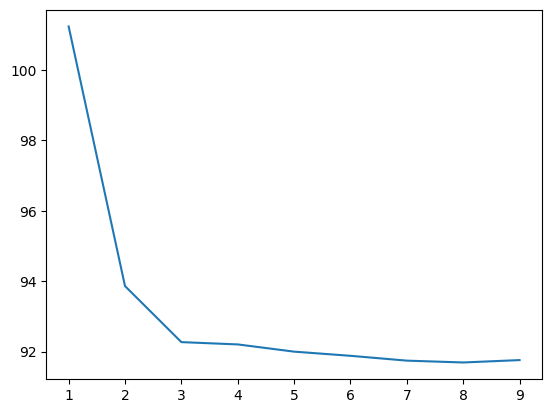

In [74]:
def elbow_method(K,Centroids):
    wcss=[]
    for k in range(1,K):
        Centroids=Centroids.copy()
        centroids,scaleCentroid=k_means(data.iloc[:,1:],k,Centroids[:k])
        s=0
        for c in range(len(centroids)):
            for j in range(len(scaleCentroid[c])):
                d=0
                for coordinat in scaleCentroid[c][j]:
                    d+=np.sqrt(np.sum((coordinat-centroids[c])**2))
                s+=d
        wcss.append(s)
        visualize(k,centroids,scaleCentroid)
    fig,ax=plt.subplots()
    ax.plot(range(1,K),wcss)
Centroids = np.array([[0.2,1],[0.15,0.2],[1,1],[0.2,0.6],[0.1,0.8],[0.4,0.1],[1,0.1],[0.1,0.9],[0.1,0.3]])
elbow_method(10,Centroids)
print(Centroids)

/tmp/ipykernel_14005/3433961060.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


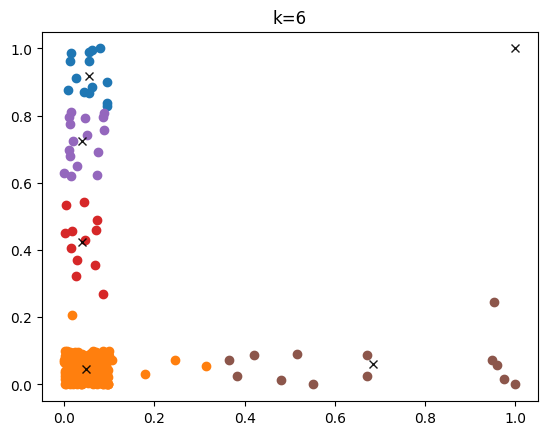

In [71]:
def visualize(k,centroids,scaleCentroid):
    clusterX=[[] for _ in range(k)]
    clusterY=[[] for _ in range(k)]
    for i in range(k):
        for j in range(len(scaleCentroid[i])):
            clusterX[i].append(scaleCentroid[i][j][0])
            clusterY[i].append(scaleCentroid[i][j][1])
    fig,ax=plt.subplots()
    ax.set_title(f"k={k}")
    for i in range(k):
        ax.scatter(clusterX[i],clusterY[i],color=f"C{i}")
    for centroid in centroids:
            ax.plot(centroid[0],centroid[1],marker="x",color="black",alpha=0.9)
    fig.show()    
visualize(k,centroids,scaleCentroid)

In [ ]:
centroids[:2]

In [ ]:
centroids

/tmp/ipykernel_14005/3114940162.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_14005/4091367923.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[[0.05376259 0.91919504]
 [0.04864631 0.04476985]
 [1.         1.        ]
 [0.04001735 0.42368355]
 [0.03951291 0.72489372]
 [0.68425661 0.06158855]]


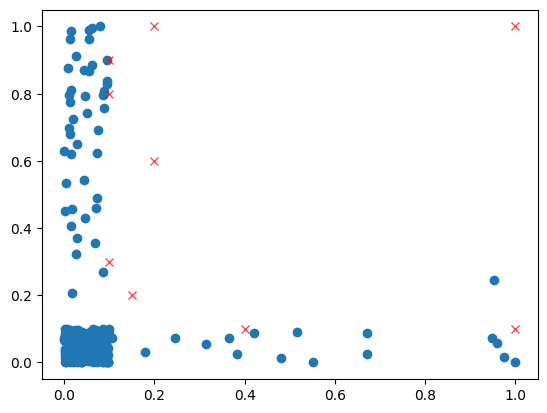

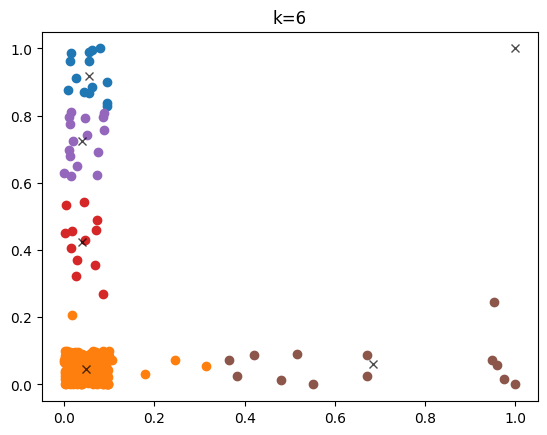

In [70]:
k=6
Centroids = np.array([[0.2,1],[0.15,0.2],[1,1],[0.2,0.6],[0.1,0.8],[0.4,0.1],[1,0.1],[0.1,0.9],[0.1,0.3]])

fig,ax=plt.subplots()
ax.scatter(data.iloc[:,1],data.iloc[:,2])

for centroid in Centroids:
    ax.plot(centroid[0],centroid[1],marker="x",color="red",alpha=0.7)
fig.show()

centroids=Centroids.copy()
centroids,scaleCentroid=k_means(data.iloc[:,1:],k,centroids[:k])

visualize(k,centroids,scaleCentroid)
print(centroids)

In [ ]:
centroids[:3]

In [ ]:
centroids[5]

In [43]:
np.isnan(np.average(np.array([[1,2],[]]),axis=0)).all()

/tmp/ipykernel_14005/2750873510.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.isnan(np.average(np.array([[1,2],[]]),axis=0)).all()


False

In [39]:
np.isnan(np.average(np.array([[np.nan,np.nan],[np.nan,np.nan]]),axis=0)).all()

True